<Body>   
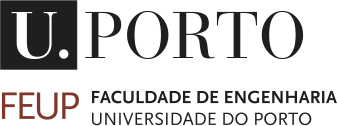
</Body>
<br>   
<br>   
<br>   

# **Mini projects on machine learning and control systems**

### 2024/2025      

<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt)

**José P. Carvalho** (jpcarvalho@fe.up.pt)

FEUP, Nov. 2024

---

# **Identification**

**Group:** 1

* **Name:** Gabriel da Costa Filipe Carvalho
 **Student Number:** 202208939
* **Name:** Guilherme Moura Pinho Andrade Silva
 **Student Number:** 202205298
* **Name:** Guilherme Ribeiro de Campelo Teixeira **Student Number:** 202204875
* **Name:** Júlio Duarte Pinto dos Santos **Student Number:** 202207975
* **Name:** Vasco Ferreira da Rocha Melo **Student Number:** 202207564


---





# MPSAC Project


**Initial setup:** To download the file **data-set.cvs**, run the next cell (only once).

In [1]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/i6h1wvis8wlay4u/data-set.zip?dl=0 --quiet
!unzip -o dataset.csv.zip -d.
import scipy

Archive:  dataset.csv.zip
  inflating: ./data-set1.csv         
  inflating: ./__MACOSX/._data-set1.csv  
  inflating: ./data-set2.csv         
  inflating: ./__MACOSX/._data-set2.csv  
  inflating: ./data-set3.csv         
  inflating: ./__MACOSX/._data-set3.csv  


All the code you will need to develop, is on the next cell.

First, implement the nonlinear controller for the agent, and after the KNN classifier.

The only restriction on the controller is that the function my_controller must return the actuation value u, and be and it has to be scalar value.

As for the KNN, it must be contained in the function myKNN(K, trainX_data, trainY_data, new_pt), and return the predicted class (like sklearn's knn.predict). There is a bonification for implementing your own KNN.


In [2]:
###################################################################################################
##                                                                                               ##
##                                      Your code starts here                                    ##
##                                                                                               ##
## Grupo 01                                                                                      ##
## 202208939 Gabriel da Costa Filipe Carvalho                                                    ##
## 202205298 Guilherme Moura Pinho Andrade Silva                                                 ##
## 202204975 Guilherme Ribeiro de Campelo Teixeira                                               ##
## 202207975 Júlio Duarte Pinto dos Santos                                                       ##
## 202207564 Vasco Ferreira da Rocha Melo                                                        ##
###################################################################################################
import operator

x_tested = 18.5
y_tested = 63.5
k_tested = 1

### Control part
def my_controller(c, b, x, xd, xd_dot):
    k = 1  # Tuning parameter
    if x > -0.7:
        u = -k*(x - xd) + xd_dot + c*abs(x)*x + b # Correção feita pelo stor no -k*(x-xd), estava k*(xd-x)
    else:
        u = max(-k * (x - xd), 0)

    u = max(min(u, 1), -1)

    return u

def set_signals(xd_signal, xd_dot_signal):
  # Complete here
  for t in range(0, len(t_signal)):
      if (t_signal[t] >= 0 and t_signal[t] < x_tested) or (t_signal[t] >= 50 and t_signal[t] < y_tested) :
          xd_signal[t] = 0.75
          xd_dot_signal[t] = 0.0
      elif (t_signal[t] >= x_tested and t_signal[t] < 50) or (t_signal[t] >= y_tested) :
          xd_signal[t] = -0.75
          xd_dot_signal[t] = 0.0

  return xd_signal, xd_dot_signal

### Machine Learning part
K = 1 #n_neighbors


## Implement KNN -
def euc_dist(pt1, pt2):
    # Distancia euclidiana entre 2 pontos
    return np.sqrt(np.sum((np.array(pt1) - np.array(pt2))**2))


def myKNN(K, trainX_data, trainY_data, new_pt):
    # Fase 1: Pegar os indices dos pontos de treino mais proximos de ponto inicial

    # Calcula a distancia do ponto inicial a todos os pontos de treino X
    distances = [(idx, euc_dist(new_pt, trainX_data[idx])) for idx in range(len(trainX_data))]

    # Dá sort das distancias por ordem crescente
    distances_sorted = sorted(distances, key=operator.itemgetter(1))

    # Pega os indices dos vizinhos k mais proximos
    nearest_indices = [distances_sorted[i][0] for i in range(K)]

    #-------------------------------------------------------------------

    # Fase 2: Com os indices, contar a ocorrencia de cada class entre os k vizinhos
    class_counts = {}
    for idx in nearest_indices:
        label = trainY_data[idx]
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

    #--------------------------------------------------------------------

    # Fase 3: Pegar a classe com o ponto de treino mais proximo e retornar
    # Dá sort das classes de acordo com com a quantidade de ocorrencias por ordem decrescente e pega o mais frequente
    sorted_class_counts = sorted(class_counts.items(), key=operator.itemgetter(1), reverse=True)
    return sorted_class_counts[0][0]
###################################################################################################
##                                                                                               ##
##                              End of your code section, do not edit the next part              ##
##                                                                                               ##
###################################################################################################

### Part 1 - Control problem

Consider the dynamic model of agent $\Sigma$ given by  

\begin{cases}
\dot x(t) = -c|x(t)|x(t) - b + u(t) + d(t) & \text{if } x > -0.7 \\
\dot x(t) = \max(u(t), 0) & \text{if } x \leq -0.7
\end{cases}


where $c,b$ are constants, $x$ is the state (position of the agent) and $u$ is the input that is restricted to $u(t)\in [-1, 1]$. The signal $d(t)$ is an unknow noisy disturbance.

**Activity 1.1** Design a feedback law for $u(t)$ such that the state $x(t)$ will track a given desired reference signal $x_d(t)$




Consider now the next figure (run the code).

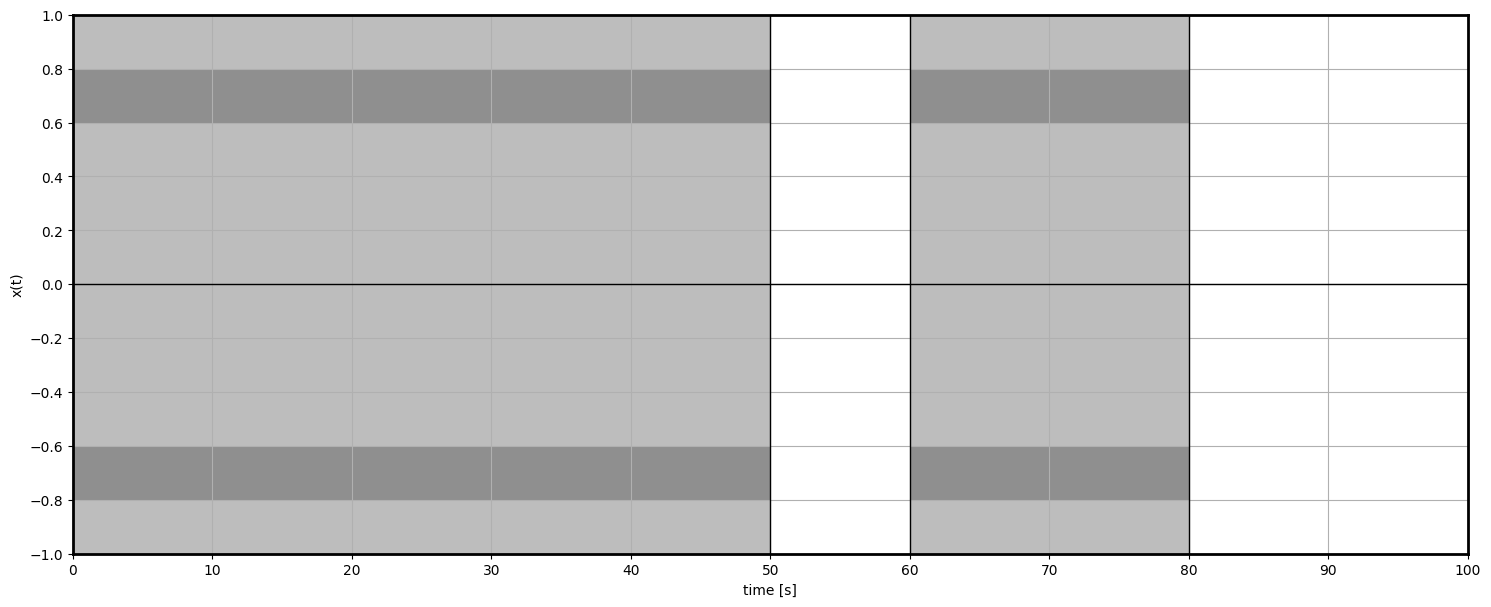

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

t_end = 100 #final time
# create a figure and axes
fig = plt.figure(figsize=(18,7))
ax = plt.subplot(1,1,1)
# set up the subplots as needed
ax.set_xlim(( 0, t_end))
ax.set_ylim((-1, 1))
ax.set_xlabel('time [s]')
ax.set_ylabel('x(t)')
ax.grid(which='both');
ax.xaxis.set_major_locator(MultipleLocator(t_end/10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.axvspan(0, 0.5*t_end, facecolor='#bdbdbd')
plt.axvspan(0.6*t_end, 0.8*t_end, facecolor='#bdbdbd')
plt.axhspan(0.6, 0.8, facecolor='#8f8f8f')
plt.axhspan(-0.6, -0.8, facecolor='#8f8f8f')
plt.axvspan(0.5*t_end, 0.6*t_end, facecolor='white')
plt.axvspan(0.8*t_end, t_end, facecolor='white')
plt.plot([0, t_end], [0, 0], 'black', lw=1)
plt.plot([0.8*t_end, 0.8*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.6*t_end, 0.6*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.5*t_end, 0.5*t_end], [-1, 1], 'black', lw=1)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)



**Activity 1.2** To test the developed control law, implement it together with an adequate selection of the desired signals $x_d(t)$ and $\dot x_d(t)$ so that the position of the agent $x(t)$
* will be (most of the time) inside the band ranging from (0.6)-(0.8), while $t\in[0, 50]$   
* and the band (-0.8)-(-0.6) while $t\in[50, 100]$.

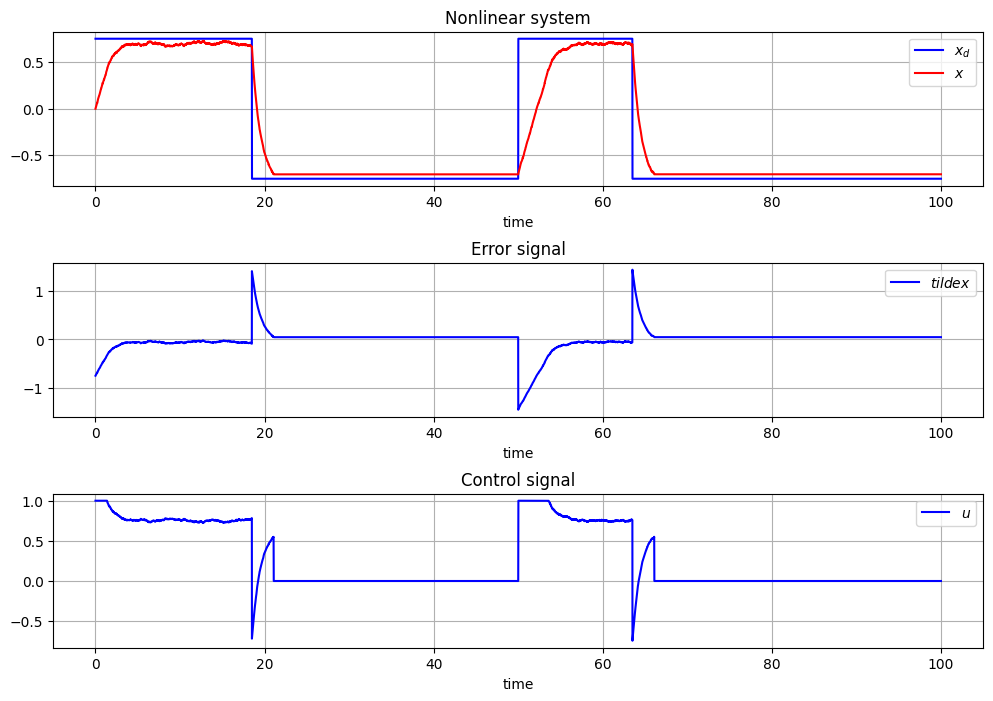

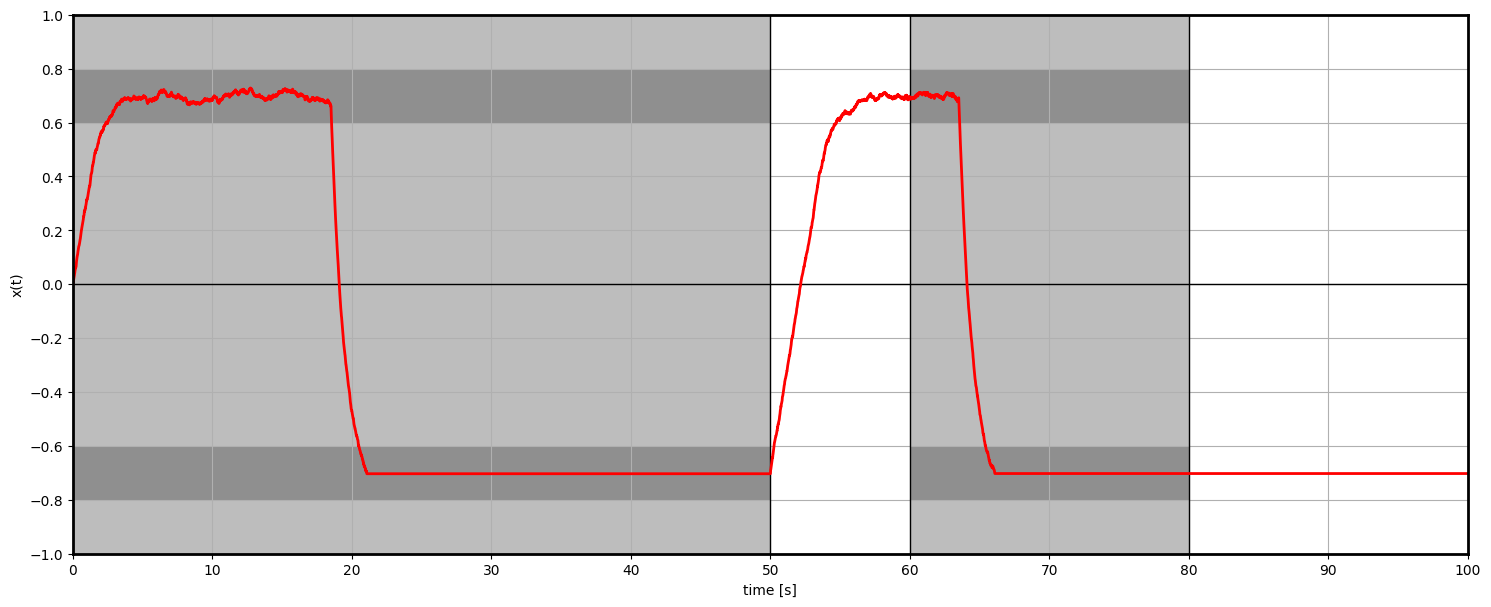

In [4]:
# DO NOT MODIFY THIS CODE

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

h = 0.01 #Sample time
c = 0.1
b = 0.65

# Discrete system
def disc_sys(x,u,h,c,b):
  if x>-0.7:
    return x + (-c*abs(x)*x -b + u + np.random.normal(-0.05, 0.2))*h
  else:
    return x + max(0,u)*h

#Signals
t_signal = np.arange(0,t_end,h) # time samples
x_signal = np.zeros_like(t_signal)
u_signal = np.zeros_like(t_signal)
xd_signal, xd_dot_signal = set_signals(np.zeros_like(t_signal), np.zeros_like(t_signal))

#Initial condition of our system
x_signal[0] = 0

np.random.seed(10)
# Iteration
for t in range(0,len(t_signal)-1):
    u_signal[t] = my_controller(c, b, x_signal[t], xd_signal[t], xd_dot_signal[t])
    # Saturate the control inputs between -1 and 1
    u_signal[t] = np.clip(u_signal[t], -1, 1)
    x_signal[t+1] = disc_sys(x_signal[t],u_signal[t],h,c,b)


#plot
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.plot(t_signal, xd_signal, 'b-', label='$x_d$')
ax1.plot(t_signal, x_signal, 'r-', label='$x$')
ax1.set_title("Nonlinear system")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(t_signal, x_signal-xd_signal, 'b-', label='$tilde x$')
ax2.set_title("Error signal")
ax2.set_xlabel("time")
ax2.grid()
ax2.legend(loc='best')

ax3.plot(t_signal[0:len(t_signal)-1], u_signal[0:len(t_signal)-1], 'b-', label='$u$')
ax3.set_title("Control signal")
ax3.set_xlabel("time")
ax3.grid()
ax3.legend(loc='best')

plt.show()


# create a figure and axes
fig = plt.figure(figsize=(18,7))
ax = plt.subplot(1,1,1)
# set up the subplots as needed
ax.set_xlim(( 0, t_end))
ax.set_ylim((-1, 1))
ax.set_xlabel('time [s]')
ax.set_ylabel('x(t)')
ax.grid(which='both');
ax.xaxis.set_major_locator(MultipleLocator(t_end/10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.axvspan(0, 0.5*t_end, facecolor='#bdbdbd')
plt.axvspan(0.6*t_end, 0.8*t_end, facecolor='#bdbdbd')
plt.axhspan(0.6, 0.8, facecolor='#8f8f8f')
plt.axhspan(-0.6, -0.8, facecolor='#8f8f8f')
plt.axvspan(0.5*t_end, 0.6*t_end, facecolor='white')
plt.axvspan(0.8*t_end, t_end, facecolor='white')
plt.plot([0, t_end], [0, 0], 'black', lw=1)
plt.plot([0.8*t_end, 0.8*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.6*t_end, 0.6*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.5*t_end, 0.5*t_end], [-1, 1], 'black', lw=1)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
pt1, = ax.plot([], [], 'b.', ms=20)
line3, = ax.plot([], [], 'r', lw=2)
line4, = ax.plot(t_signal, x_signal, 'r-', lw=2)

### Part 2 - Machine learning problem

Consider the following $\color{blue}{\text{training data set}}$ composed by 100 samples of class 1 and another 100 samples of class 2.


In [5]:
import pandas as pd
dataTrain = pd.read_csv('data-set1.csv', index_col=0)
dataTrain


,feature 1,feature 2,label
0,-5.535047,-3.539697,1.0
1,-4.073557,-6.505985,1.0
2,-5.641425,-4.560727,1.0
3,-5.119353,-4.716652,1.0
4,-5.067489,-5.035938,1.0
...,...,...,...
195,1.772352,0.395708,2.0
196,1.131479,0.180728,2.0
197,0.524661,0.250459,2.0
198,4.754778,2.692851,2.0


Let's visualize it!

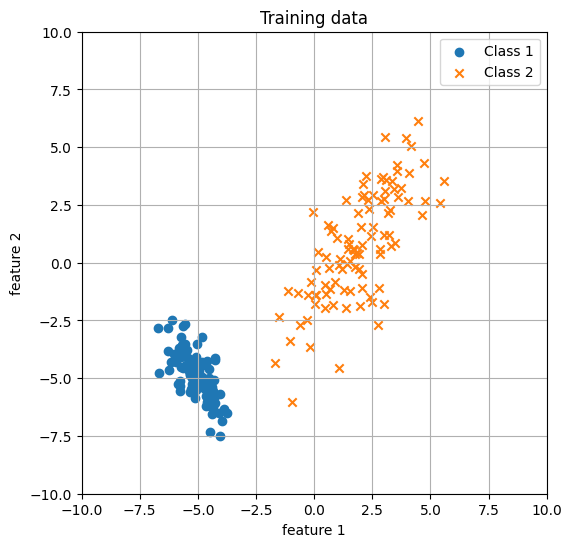

In [6]:
X_1 = dataTrain.iloc[0:100, np.arange(0,2,1)].values
X_2 = dataTrain.iloc[100:200, np.arange(0,2,1)].values
X = dataTrain.iloc[:, np.arange(0,2,1)].values
Y = dataTrain["label"].values

plt.figure(figsize=(6,6))
plt.scatter(X_1[:,0], X_1[:,1], marker='o', label='Class 1')
plt.scatter(X_2[:,0], X_2[:,1], marker='x', label='Class 2')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Training data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc='best')
plt.grid()
plt.show()


Consider also the $\color{blue}{\text{test data set}}$
composed by a total of $\color{blue}{3000}$ samples, where it is known that around $\color{blue}{1/3}$ of them belong to class 1 and the rest to class 2.

In [7]:
dataTest = pd.read_csv('data-set2.csv', index_col=0)
dataYTest = pd.read_csv('data-set3.csv', index_col=0)
dataTest


,feature 1,feature 2
0,-4.275528,-6.344763
1,0.189112,-1.783335
2,1.351171,0.362168
3,-1.763409,-2.672367
4,2.973722,1.237152
...,...,...
2995,-4.492199,-4.700613
2996,-4.293387,-5.685385
2997,1.036334,-0.988838
2998,3.475178,1.192830


Let's visualize it!

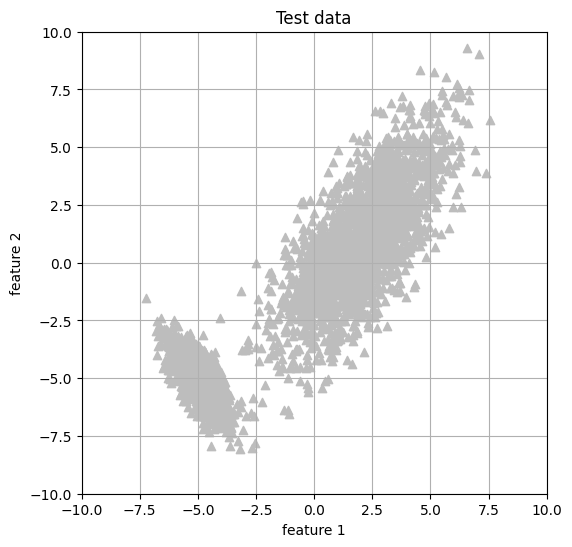

In [8]:
testX = dataTest.iloc[:, np.arange(0,2,1)].values

plt.figure(figsize=(6,6))
plt.scatter(testX[:,0], testX[:,1], marker='^', facecolor='#bdbdbd')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Test data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid()

**Activity 2.1** Implement a K-Nearest Neighbors classifier and test it for each sample of the test data using all the training data.

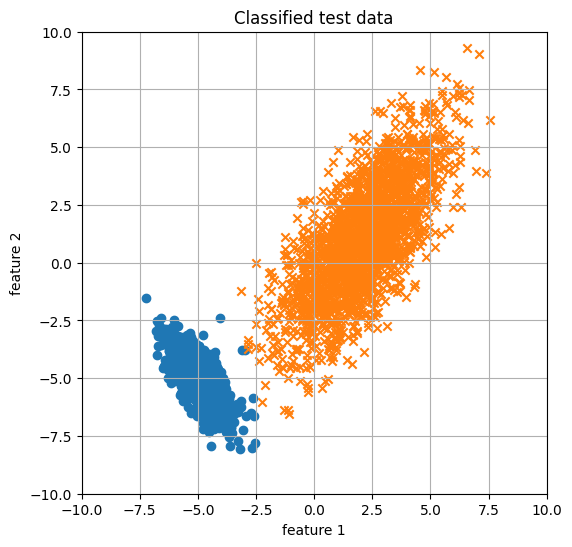

In [9]:


#test_pt = np.array([-2.5,-0.5])
#print("Class: ", int(myKNN(K,X,y,test_pt).mode))

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

classification = []
for i in range(len(testX)):
  classification.append(int(myKNN(K,X,Y,testX[i])))

classification = np.array(classification)

plt.figure(figsize=(6,6))
plt.scatter(testX[np.where(classification==1),0], testX[np.where(classification==1),1], marker='o')
plt.scatter(testX[np.where(classification==2),0], testX[np.where(classification==2),1], marker='x')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('Classified test data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.grid()




### Part 3 - Combined control and machine learning problem

Consider again the first figure of this notebook. The figure is split into 4 regions in time. The dark ones correspond to training and the white ones to test (evaluation). \\
In the training region:
* while the agent position $x(t)$ is in the dark band region the agent receives one training sample per second. If it is in the upper band, the sample belongs to class 1. If it is in the lower band, the sample belongs to class 2.

In the evaluation region:
* the agent receives 100 test samples per second and it has to classify them.

**Goal**: By controlling the movement of the agent $\Sigma$ and the parameter of the classifier, try to minimize the error of classification and the energy (while in the training region) of the input signal $u_t$!

How is this measured?
\begin{align*}
J &= 0.3\big(\text{Number of misclassified samples in the first test region}\big) \\
&\quad +   0.7\big(\text{ Number of misclassified samples in the second test region}\big) \\
&\quad+ 0.5  \big(\sum_{t=0}^{50} u_t^2 + \sum_{t=60}^{80} u_t^2 \big)w
\end{align*}
where $w=1/100$ is a weight coefficient.




In [10]:
# DO NOT MODIFY THIS CODE
np.random.seed(123)
energy_R1 = 0
count_class1_R1, count_class2_R1  = 0, 0
for t in np.arange(0, 5000):
  if t_signal[t] < 50 or (t_signal[t] >= 60 and t_signal[t] < 80):
    if x_signal[t] <= 0.8 and x_signal[t] >= 0.6:
      count_class2_R1 += 1
    if x_signal[t] <= -0.6 and x_signal[t] >= -0.8:
      count_class1_R1 += 1
    energy_R1 = energy_R1 + u_signal[t]**2
count_class1_R1 = int(count_class1_R1*h)
count_class2_R1 = int(count_class2_R1*h)
print("Region 1")
print("Number of collected training samples in class 1: ", count_class1_R1)
print("Number of collected training samples in class 2: ", count_class2_R1)

energy_R2 = 0
count_class1_R2, count_class2_R2  = 0, 0
for t in np.arange(6000, 8000):
  if t_signal[t] < 50 or (t_signal[t] >= 60 and t_signal[t] < 80):
    if x_signal[t] <= 0.8 and x_signal[t] >= 0.6:
      count_class2_R2 += 1
    if x_signal[t] <= -0.6 and x_signal[t] >= -0.8:
      count_class1_R2 += 1
    energy_R2 = energy_R2 + u_signal[t]**2
count_class1_R2 = int(count_class1_R2*h)
count_class2_R2 = int(count_class2_R2*h)
print("Region 2")
print("Number of collected training samples in class 1: ", count_class1_R2)
print("Number of collected training samples in class 2: ", count_class2_R2)

iter = 5
error_clas_R2 = np.zeros(iter)
error_clas_R1 = np.zeros(iter)
for j in range(iter):
  testY = dataYTest["label"].values
  random_indices_X_1 = np.random.randint(0, X_1.shape[0], count_class1_R1)
  random_indices_X_2 = np.random.randint(0, X_2.shape[0], count_class2_R1)
  X_train = np.vstack((X_1[random_indices_X_1], X_2[random_indices_X_2]))
  Y_train = np.concatenate((np.ones(count_class1_R1),
                      2*np.ones(count_class2_R1)))

  for i in np.arange(0, 1000):
    result = myKNN(K, X_train, Y_train, testX[i])
    if result != testY[i]:
      error_clas_R1[j] += 1

  testY = dataYTest["label"].values
  random_indices_X_1 = np.random.randint(0, X_1.shape[0], count_class1_R2+count_class1_R1)
  random_indices_X_2 = np.random.randint(0, X_2.shape[0], count_class2_R2+count_class2_R1)
  X_train = np.vstack((X_1[random_indices_X_1], X_2[random_indices_X_2]))
  Y_train = np.concatenate((np.ones(count_class1_R1+count_class1_R2),
                      2*np.ones(count_class2_R1+count_class2_R2)))

  for i in np.arange(1000, testX.shape[0]):
    result = myKNN(K, X_train, Y_train, testX[i])
    if result != testY[i]:
      error_clas_R2[j] += 1
print(" ")
print("Number of misclassified samples in the first region: ", error_clas_R1)
print("Average Number of misclassified samples in the first region: ", np.mean(error_clas_R1))
print("Input energy in the first region: ", energy_R1/100)
print("Number of misclassified samples in the second region: ", error_clas_R2)
print("Average Number of misclassified samples in the second region: ", np.mean(error_clas_R2))
print("Input energy in the second region: ", energy_R2/100)
print("Total  average error of classification: ", np.mean(error_clas_R1+error_clas_R2))
print("Total input energy: ", (energy_R1+energy_R2)/100)
print("Average Performance index J = ", 0.3*(np.mean(error_clas_R1))+0.7*(np.mean(error_clas_R2)) + 0.5*(energy_R1+energy_R2)/100)
print("Performance index J = ", 0.3*((error_clas_R1))+0.7*((error_clas_R2)) + 0.5*(energy_R1+energy_R2)/100)

Region 1
Number of collected training samples in class 1:  29
Number of collected training samples in class 2:  16
Region 2
Number of collected training samples in class 1:  14
Number of collected training samples in class 2:  3
 
Number of misclassified samples in the first region:  [13. 11. 13. 13.  7.]
Average Number of misclassified samples in the first region:  11.4
Input energy in the first region:  11.805035684532456
Number of misclassified samples in the second region:  [18. 11. 10.  8.  4.]
Average Number of misclassified samples in the second region:  10.2
Input energy in the second region:  2.3686166921005234
Total  average error of classification:  21.6
Total input energy:  14.17365237663298
Average Performance index J =  17.64682618831649
Performance index J =  [23.58682619 18.08682619 17.98682619 16.58682619 11.98682619]


In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)


# create a figure and axes
fig = plt.figure(figsize=(18,7))
ax = plt.subplot(1,1,1)
# set up the subplots as needed
ax.set_xlim(( 0, t_end))
ax.set_ylim((-1, 1))
ax.set_xlabel('time [s]')
ax.set_ylabel('x(t)')
ax.grid(which='both');
ax.xaxis.set_major_locator(MultipleLocator(t_end/10))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
plt.axvspan(0, 0.5*t_end, facecolor='#bdbdbd')
plt.axvspan(0.6*t_end, 0.8*t_end, facecolor='#bdbdbd')
plt.axhspan(0.6, 0.8, facecolor='#8f8f8f')
plt.axhspan(-0.6, -0.8, facecolor='#8f8f8f')
plt.axvspan(0.5*t_end, 0.6*t_end, facecolor='white')
plt.axvspan(0.8*t_end, t_end, facecolor='white')
plt.plot([0, t_end], [0, 0], 'black', lw=1)
plt.plot([0.8*t_end, 0.8*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.6*t_end, 0.6*t_end], [-1, 1], 'black', lw=1)
plt.plot([0.5*t_end, 0.5*t_end], [-1, 1], 'black', lw=1)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)


# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax.set_title('')
pt1, = ax.plot([], [], 'b.', ms=20)
line3, = ax.plot([], [], 'r', lw=2)
#line4, = ax.plot(t_signal, x_signal, 'r-', lw=2)

def drawframe(n):
    size_x = len(x_signal)
    frames = 100
    t_win = int(size_x/frames*(n+1)-1)
    line3.set_data(t_signal[0:t_win],x_signal[0:t_win])
    pt1.set_data(t_signal[t_win],x_signal[t_win])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (pt1, line3)


from matplotlib import animation
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=50, blit=True)

plt.close(anim._fig)

from IPython.display import HTML
HTML(anim.to_html5_video())


<ipython-input-11-eab779216495>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(t_signal[t_win],x_signal[t_win])
<ipython-input-11-eab779216495>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pt1.set_data(t_signal[t_win],x_signal[t_win])


**Question 1** Show how you got to the controller in Activity 1. Can either be done in here or in paper.

- When creating the controller, the only value we define the value of is $u(x)$, as it's the input function we give to counter balance all other variables and maintain the control system stable.

- This is the dynamic model given to us:
\begin{cases}
\dot x(t) = -c|x(t)|x(t) - b + u(t) + d(t) & \text{if } x > -0.7 \\
\dot x(t) = \max(u(t), 0) & \text{if } x \leq -0.7
\end{cases}

- Therefore, when $x > -0.7$, $u(x) = \dot x(t) + c|x(t)|x(t) + b - k(x - xd)$, where we remove $d(t)$ from the equation since we could not add a way to compensate it and add $- k(x - xd)$, as this is term that will allow the control to adjust to the current position and try to achieve position $xd$. $x-xd$ is simply the tracking error (the difference between the current position and the desired one) and $k$ is a value determined by ourselves that adjusts the responsiveness of our control system.



**Question 1.1** Explain the reasoning behind the choice of k parameter in the controller.


- As explained previously, $k$ is a variable in the controller that adjusts the responsiveness of the control system. Since the value of this variable is determined by ourselves, we tried to find the value which yielded the best results.

- As for all variables that are determined by us in the project, as we will mention in upcoming questions, we used a script to perform a multitude of tests to our program. We tested an atribute for various values, recorded results, decided which was the best for our program, and use that value.

- Using this process, along with other variables, we decided the best value for $k$ in our context was 1.

**Question 1.2** Explain the strategy (in terms of energy spenditure) you chose with the choice of the reference **xd**.

-  With the model previously defined and the fact that the energy spent is simply $u(t)^2$ in the zones destined for training, means that the value of energy is equally higher as you get further from 0.0, either downwards or upwards, except for $x <= -0.7$, where the value of $u(t)$ is always 0, as the other value in the $max()$ case is always negative.

-  Therefore, since our time in -0.7 is limited, as we need data from both training zones, our only concern is to try and limit transitions from one zone to another, as they spend energy without yielding results.

-  So, given this, we found that in $0 <= x <= 50$, we had to have data from both zones, as an evaluation would be performed immediately afterwards. Given that, we perform a transition to the top zone from the beginning, which didn't cost as much as it traveled from 0.0 and not from the other end of the spectrum, and a transition in the middle of the training section from the top zone to the bottom zone.

-  In $50 < x < 60$, we did a transition from the bottom section to the top on, as in this zone there isn't any energy spent.

-   Finally, in $60 <= x <= 80$, we capture data from the top area, and then performed a single transition to the bottom area, where we stayed until the end.

-  Just like other variables, all these choices were supported by the tests performed by our script, which suggested this approach.

**Question 2**  Justify the value of K in the KNN implementation. You can show how different values of K perform.

-  For our project, we chose 1 as the value of K in KNN, which means we are only collecting the closest value to our test sample.

-  In the script previously mentioned, we tested various values of K by only changing those values, isolating all other variables from testing. These results suggested that the higher the value of K (the more neighbours accepted), the lower the level of J was, which means that accepting more neighbours affected the performance negatively. For this reason, the value 1 was chosen.


**Question 2.1** Which class is harder to classify? Justify your results.





---


Tip: You can use a confusion Matrix.

- Given various statistics, class 2 is harder to classify than class 1.

-  Firstly, class 2 has a lot fewer samples to be evaluated, therefore is more vulnerable to outliers and incorrect results.

- Besides that, class 2 represents the zone in the graph with more energy spenditure, which can make these results more unreliable, as opposite to class 2 we have to toggle the need for data from this class with the energy spent to get it.

- Finally, the fact it has fewer samples makes it so that the KNN algorithm has a harder time evaluating it.

- For these reasons and more, class 2 is harder to classify.

**Question 2.2** What was your strategy in the collection of samples to construct the dataset? Why?


Tip: You can plot the Dataset


- Our strategy of sample colletion was already mentioned in a previous question. Firstly, we assumed that the best strategy would be to immediately rise to the upper sample zone, then at some point drop to the lower zone, then rise again in the zone with no energy spenditure, and then drop again before the end.

- Based on this format, we then tried many tweeks on the script in order to figure out the best strategy, including changing from upper to lower at different zones, trying to go lower first, etc...

- After many tries, this yielded the best results, and therefore was selected as the final strategy. Since this can be considered a brute-force approach, there is a chance that our strategy is not the best one. However, given our testing approach, we believe that our strategy is pretty accurate.

**Feedback**

This project offered us a different challenge that we're used to, especially by utilizing tecnologies we were completely new too, mainly the concept of control system. In general, we must say we enjoyed the challenge faced.

However, we have to point out that the subjects learnt in the curricular unit are too much for the class time we had. Although we understand this due to it being an optional unit, the amount of subjects learnt should be reconsidered to some degree.